In [77]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data=pandas.read_csv(r"F:\archive\HR_comma_sep.csv")

## we have 15 thounsands employees 
##### satisfaction_level: ranges from 0-1.
##### last_evaluation: It is evaluated performance by the ompany and it ranges from 0-1.
##### number_projects: number of projects he worked at
##### average_monthly_hours: how many average numbers of hours worked by an employee in a month?
##### time_spent_company: the number of years he worked at the company.
##### work_accident: whether an employee has had a work accident or not.
##### left: whether the employee has left the company or not.
##### promotion_last_5years: whether he had a promotion in the last 5 years or not.
##### sales: in what department he work
##### Salary: salary level of the employee such as low, medium and high.


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [80]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 23% of employees left the company  

#### we can see that they had low sastifaction level and worked more than the people who stayed at the company 

In [81]:
left = data.groupby('left')
left_emp=data[data['left']==1].count()
print(left_emp)
left.mean()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Visualization Summary
##### most of the employees has average satisfaction_level except a few who has high Satisfaction and a few who has low Satisfaction.
##### most of the employee is doing the project from 3-5.
##### there is a huge drop between 3 years and 4 years experienced employee.
##### a small number of employee get the promotion in the last 5 year.
##### the sales department is having maximum number of employees followed by technical and support
##### Most of the employees are getting salary either medium or low.

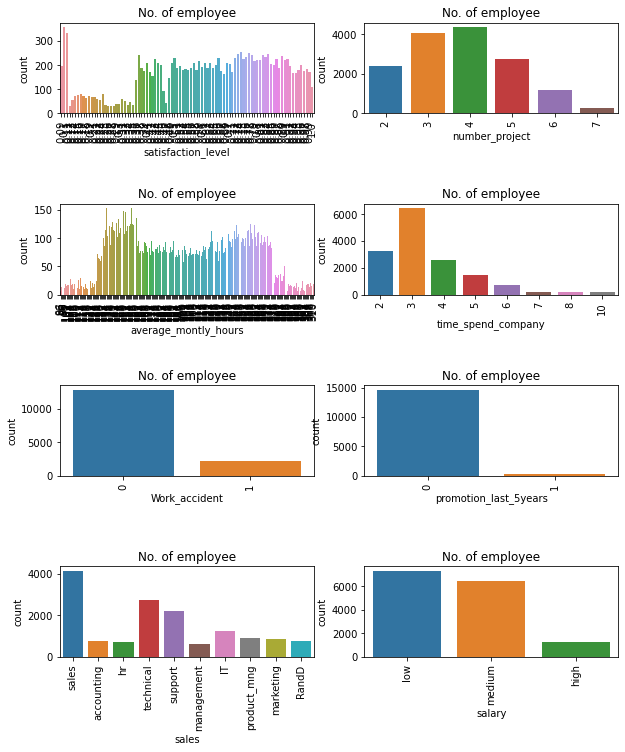

In [82]:
features=['satisfaction_level','number_project','average_montly_hours',
          'time_spend_company','Work_accident', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Visualization Summary
##### those employees who have 2 projects or more than 5  were left the company.
##### the employee who done 7 projects left the company it seems to like that they were overloaded with work.
##### the employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving.
##### those who promotion in last 5 years they didn't leave.

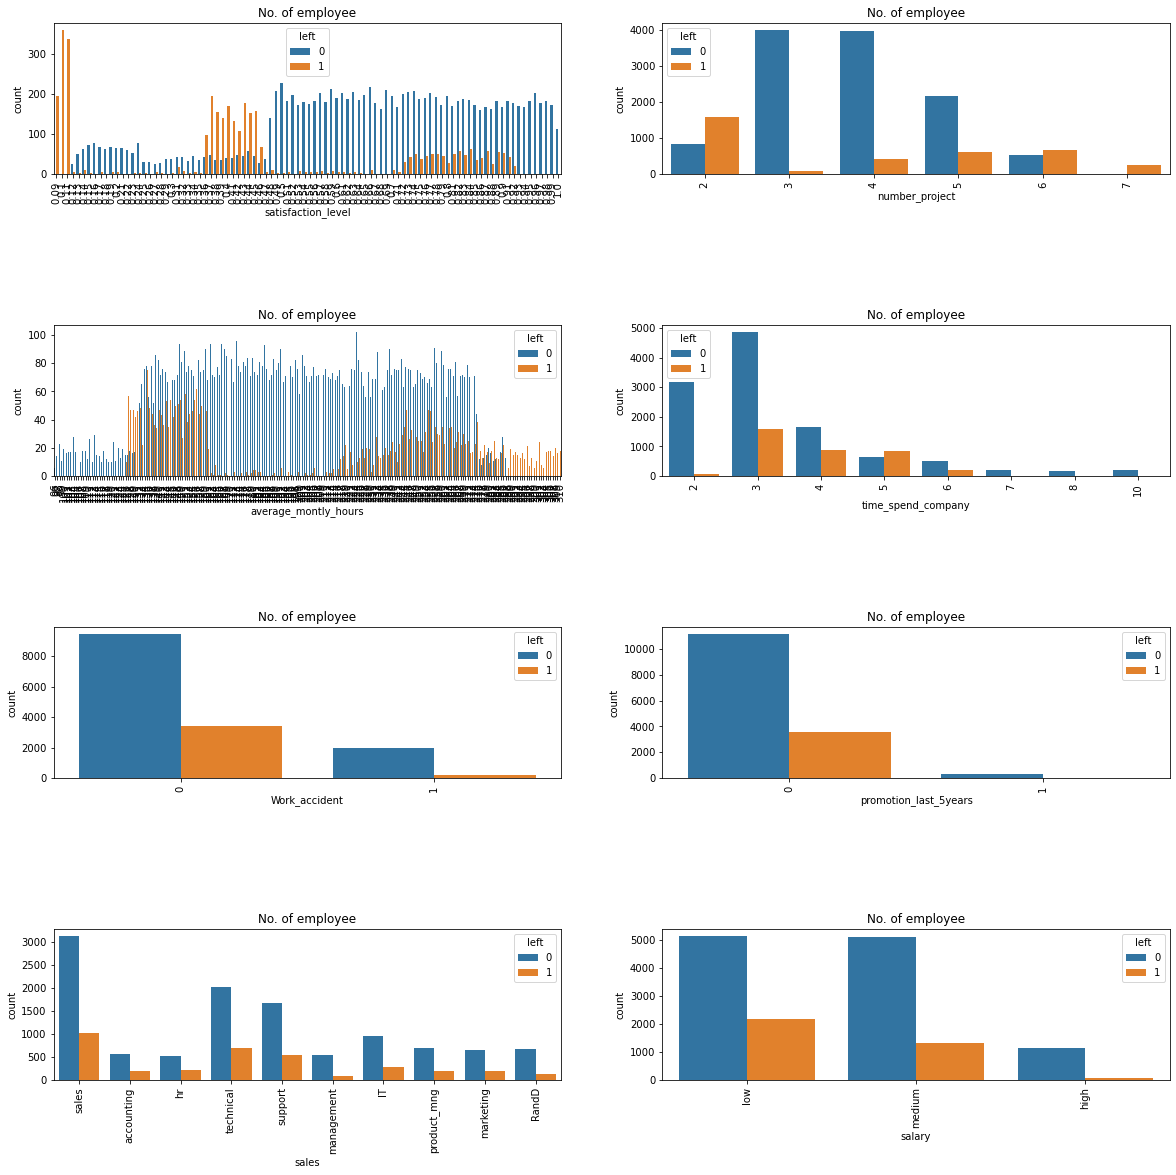

In [83]:
fig=plt.subplots(figsize=(20,25))
for i, j in enumerate(features):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Data Analysis and Visualization Summary
### most important factor for any employee to stay or leave is promotion, satisfaction and performance in the company. so we use k-means algo to cluster them.

## employee who left the company can be grouped into 3 types of employees:

### High Satisfaction and High Evaluation(green), so they get all the experience they looking for another great experience in another company.
### Moderate Satisfaction and moderate Evaluation (grey), you can say that job isn't suitable for them
### Low Satisfaction and High Evaluation(blue), so they need a better opportunity.


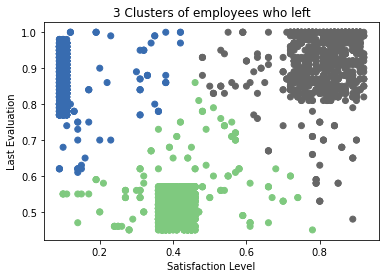

In [84]:
from sklearn.cluster import KMeans
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

## employee who left the company can be grouped into 3 types of employees:

### High Satisfaction and High Evaluation(green), so they get all the experience they looking for another great experience in another company.
### Moderate Satisfaction and moderate Evaluation (grey), you can say that job isn't suitable for them
### Low Satisfaction and High Evaluation(blue), so they need a better opportunity.


## label encoding
### encode the data by maping each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

## Split Train and Test Set
#### we divide the dataset into a training set and a test
#### dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [86]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary']]
y=data['left']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

## Model Building
### employee churn prediction model.
##### we are going to predict churn using Gradient Boosting Classifier.

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

# Evaluating Model Performance
## we got a classification rate of 97%
## we got precision which menas employee is going to leave, that employee actually left 95% of the time.
## Recall: If there is an employee who left present in the test set and our Gradient Boosting model can identify it 92% of the time.

In [88]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9713333333333334
Precision: 0.9573229873908826
Recall: 0.9207089552238806
